<a href="https://colab.research.google.com/github/uavinash15/Machine-Learning/blob/main/Multi_Linear_Regression_Cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
cars=pd.read_csv("Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [4]:
cars.isnull().sum()

,0
HP,0
MPG,0
VOL,0
SP,0
WT,0


# **Correlation Matrix**

In [5]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


# **Scatter plots between variables along with Histograms**

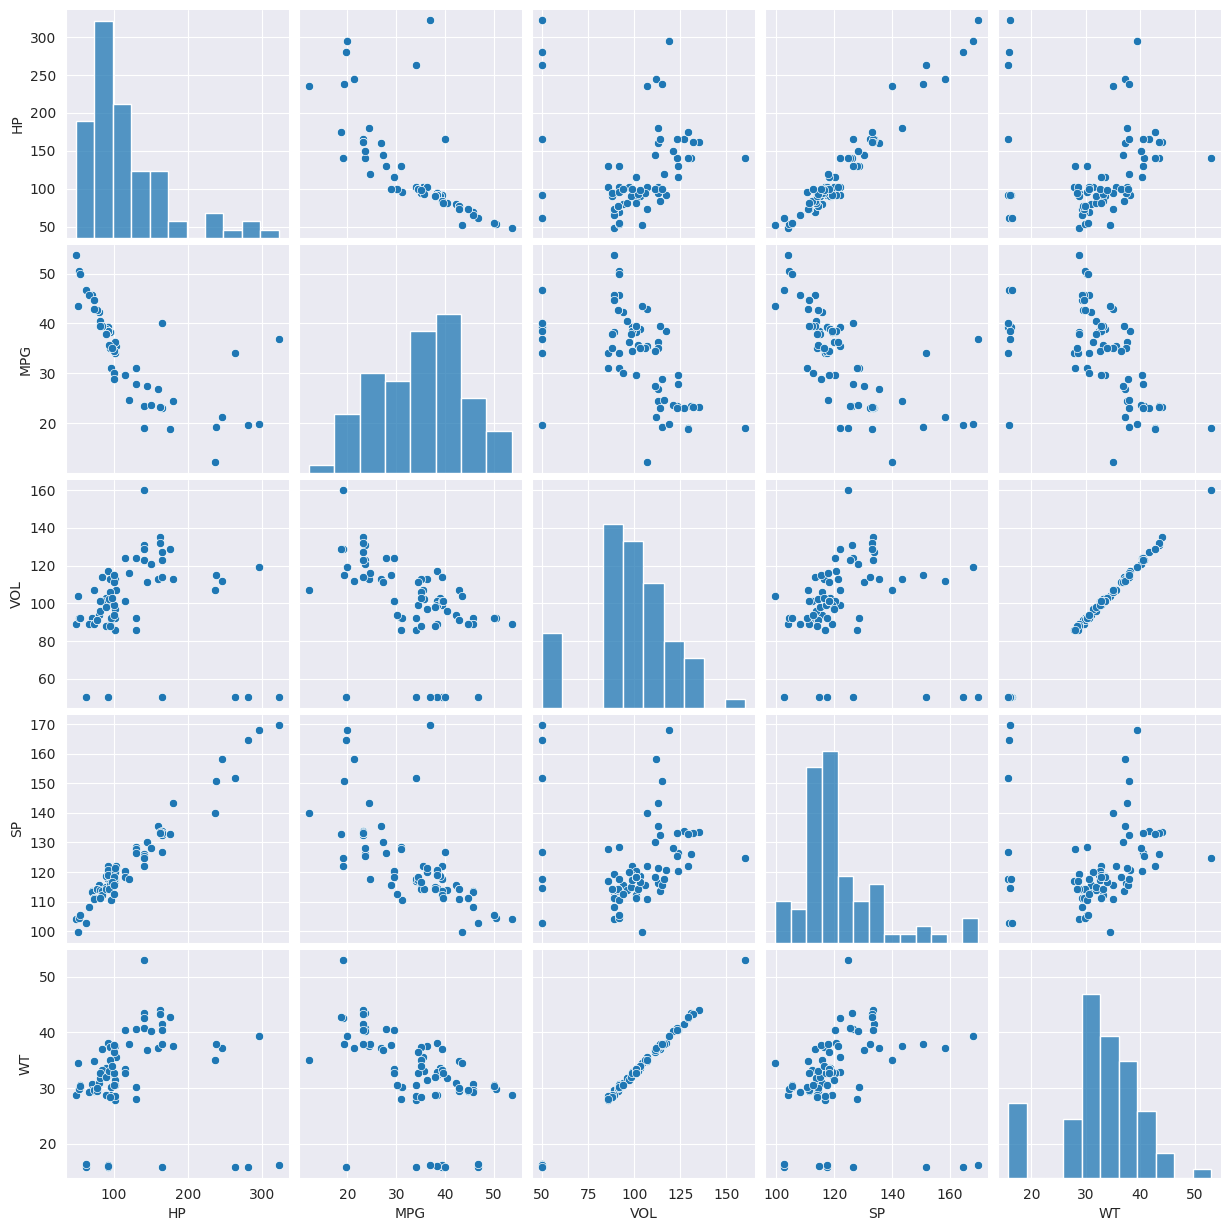

In [6]:
sns.set_style(style='darkgrid')
sns.pairplot(cars)
plt.show()

# **Preparing a Model**

In [7]:
# building model
import statsmodels.formula.api as smf
model=smf.ols('MPG~HP+VOL+SP+WT',data=cars).fit()

In [8]:
# coefficients
model.params

,0
Intercept,30.677336
HP,-0.205444
VOL,-0.336051
SP,0.395627
WT,0.400574


In [9]:
# t and p values
print(model.tvalues,'\n',model.pvalues)

Intercept    2.058841
HP          -5.238735
VOL         -0.590970
SP           2.499880
WT           0.236541
dtype: float64 
 Intercept    0.042936
HP           0.000001
VOL          0.556294
SP           0.014579
WT           0.813649
dtype: float64


In [10]:
# vol and WT is >0.05

In [11]:
# R Squarred Values
print("R^2    : ",model.rsquared)
print("adjR^2 : ",model.rsquared_adj)

R^2    :  0.7705372737359842
adjR^2 :  0.7584602881431413


In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Mon, 25 Aug 2025   Prob (F-statistic):           1.54e-23
Time:                        15:39:36   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# **Simple Linear Regression Model**

In [13]:
ml_vol=smf.ols('MPG~VOL',data=cars).fit()
# t val, p val
print(" t values: ")
print(ml_vol.tvalues)
print("-------------")
print("p values: ")
print(ml_vol.pvalues)

 t values: 
Intercept    14.106056
VOL          -5.541400
dtype: float64
-------------
p values: 
Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


In [14]:
ml_wt=smf.ols('MPG~WT',data=cars).fit()
# t val, pval
print("t values")
print(ml_wt.tvalues)
print("------------")
print("p values")
print(ml_wt.pvalues)


t values
Intercept    14.248923
WT           -5.508067
dtype: float64
------------
p values
Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64


In [15]:
ml_volwt=smf.ols('MPG~VOL+WT',data=cars).fit()
print(ml_volwt.tvalues,ml_volwt.pvalues)

Intercept    12.545736
VOL          -0.709604
WT            0.489876
dtype: float64 Intercept    2.141975e-20
VOL          4.800657e-01
WT           6.255966e-01
dtype: float64


# **Calculating VIF(Variance Influencing Factor)**

In [16]:
hp_mod=smf.ols('HP~VOL+SP+WT',data=cars).fit()
hp_rsq=hp_mod.rsquared
hp_vif=1/(1-hp_rsq)
print(hp_vif)

19.92658897499852


In [17]:
vol_mod=smf.ols('VOL~HP+SP+WT',data=cars).fit()
vol_rsq=vol_mod.rsquared
vol_vif=1/(1-vol_rsq)
print(vol_vif)

638.8060836592878


In [18]:
sp_mod=smf.ols('SP~HP+VOL+WT',data=cars).fit()
sp_rsq=sp_mod.rsquared
sp_vif=1/(1-sp_rsq)
print(sp_vif)

20.00763878305008


In [19]:
wt_rsq=smf.ols('WT~HP+VOL+SP',data=cars).fit().rsquared
wt_vif=1/(1-wt_rsq)
print(wt_vif)

639.5338175572624


In [20]:
df={'variable':['HP','VOL','SP','WT'],
    'VIF':[hp_vif,vol_vif,sp_vif,wt_vif]
}
vif_df=pd.DataFrame(df)
vif_df

,variable,VIF
0,HP,19.926589
1,VOL,638.806084
2,SP,20.007639
3,WT,639.533818


# **Test for Normality of Residuals (Q-Q Plot)**

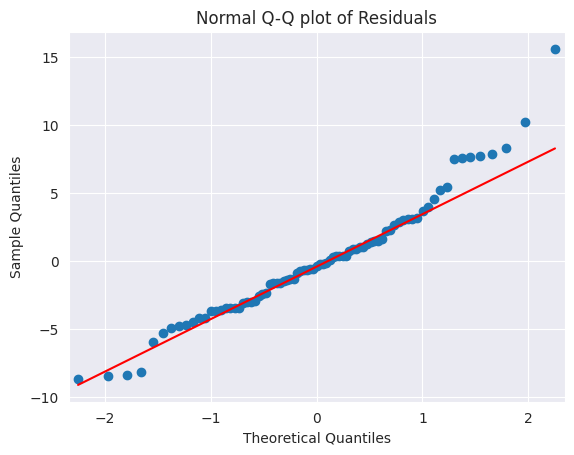

In [21]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot of Residuals')
plt.show()

In [22]:
model.fittedvalues #these are predicted MPG values

,0
0,43.441935
1,42.388793
2,42.279341
3,42.538360
4,42.172648
...,...
76,21.282096
77,17.899050
78,26.136453
79,12.316612


In [23]:
model.resid # these are differenceo of Acual vales and predicted vals of MPG:

,0
0,10.258747
1,7.624608
2,7.734060
3,3.157963
4,8.331584
...,...
76,15.617904
77,1.298838
78,7.863547
79,7.517122


In [24]:
def get_standardized_values(vals):
  return ((vals-vals.mean())/vals.std())

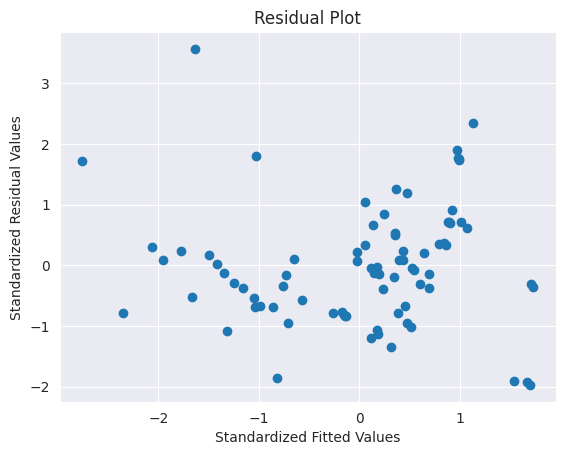

In [25]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

# **Residuals vs Regressors**

Regressors (also known as independent variables or features) are the input variables in a regression model that are used to predict the value of the dependent variable (or target variable). In simpler terms, they are the factors that you believe influence the outcome you are trying to predict.

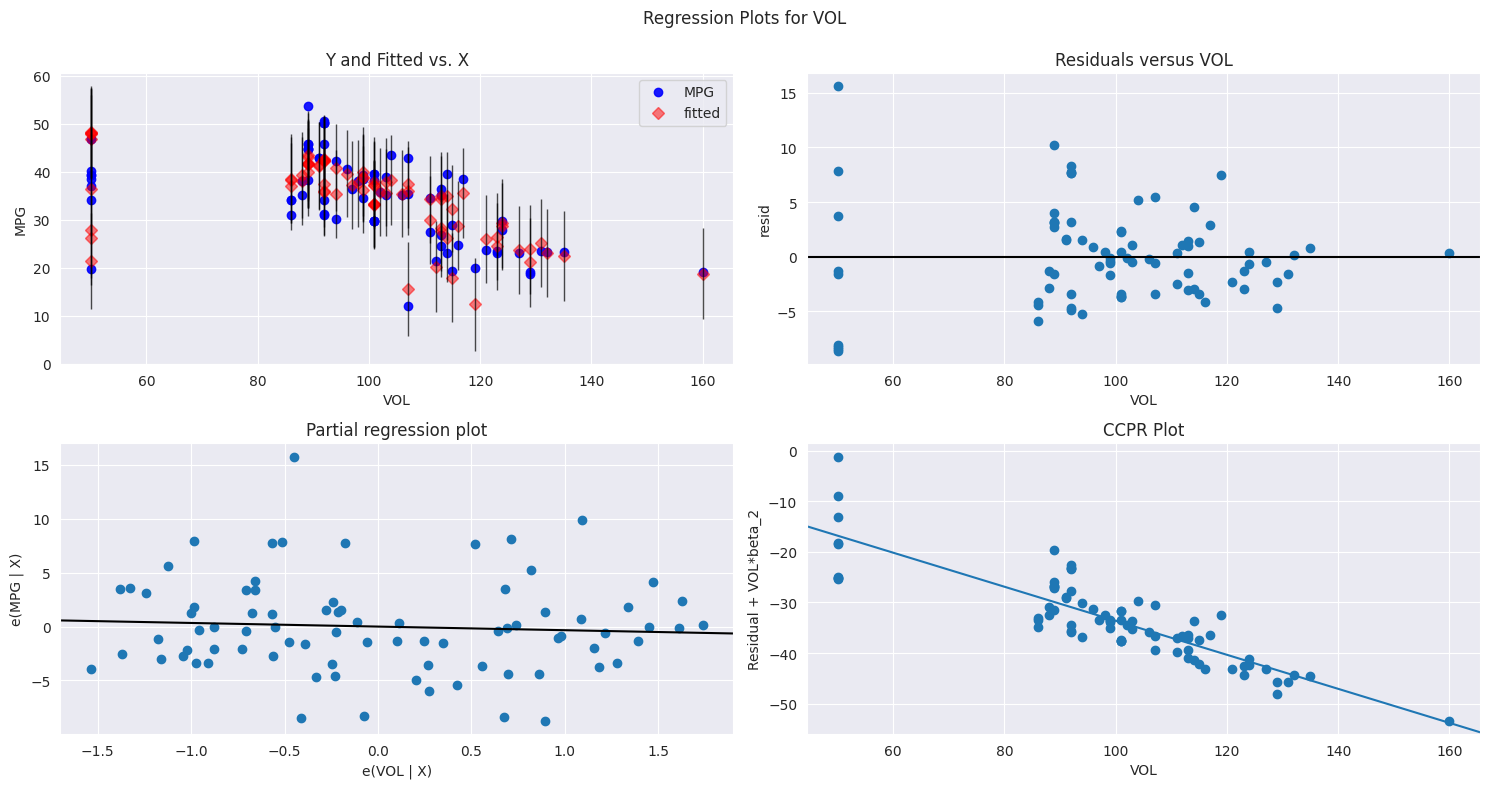

In [26]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"VOL",fig=fig)
plt.show()

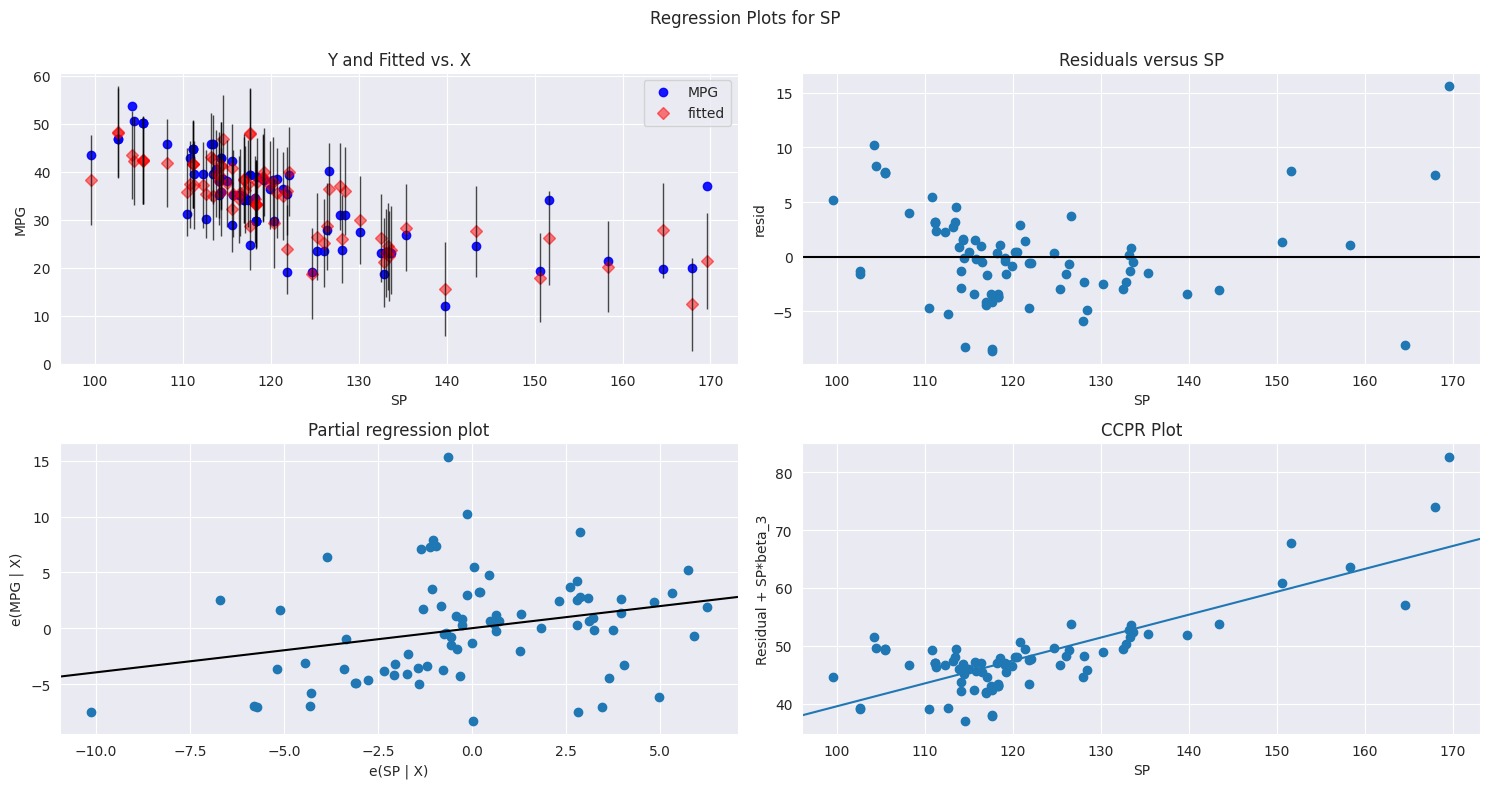

In [27]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"SP",fig=fig)
plt.show()

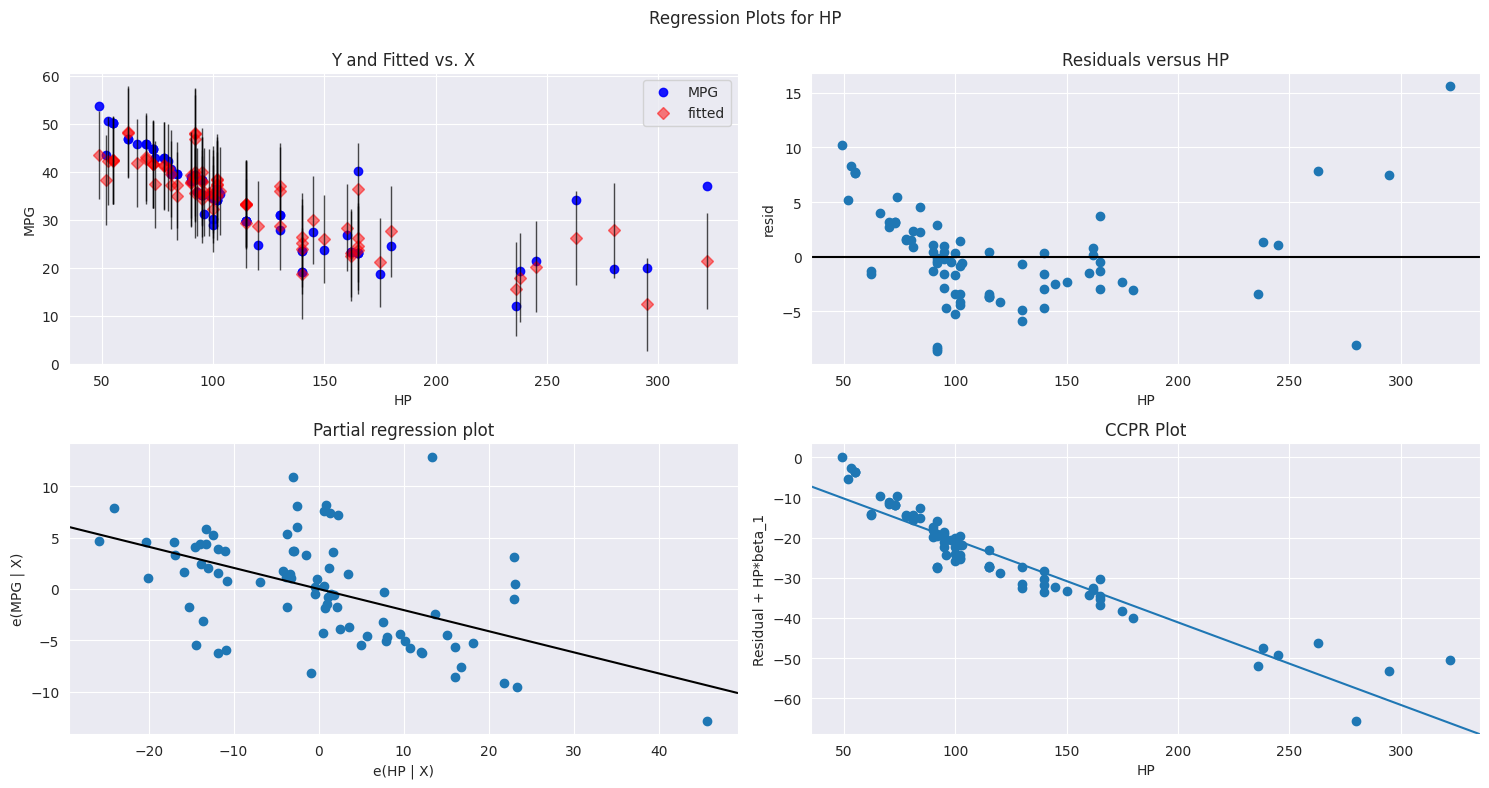

In [28]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"HP",fig=fig)
plt.show()

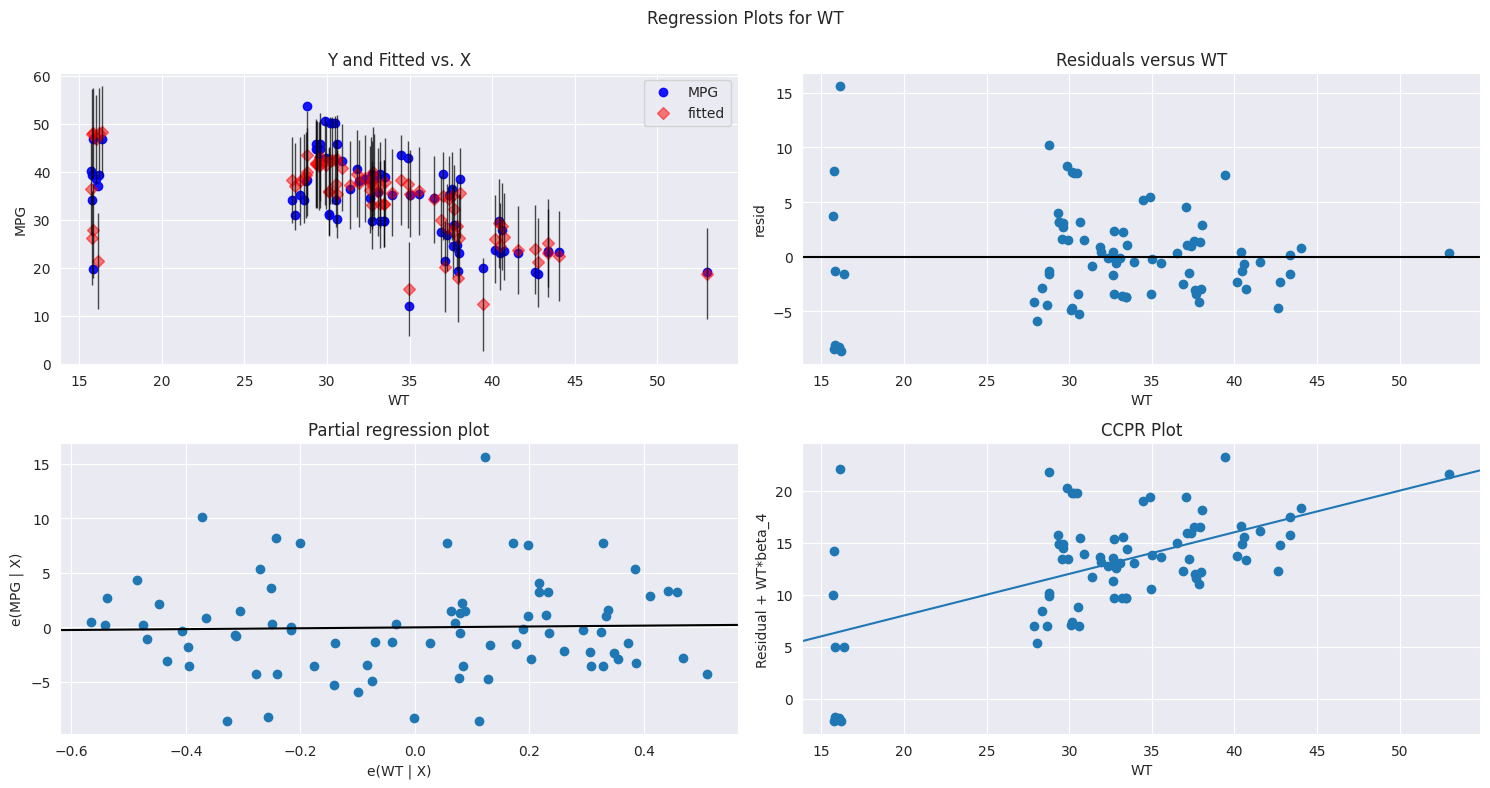

In [29]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"WT",fig=fig)
plt.show()

# **Detecting Influencers/Outliers**

# **Cook's Distance**

In [30]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

In [31]:
np.arange(len(cars))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80])

In [32]:
np.round(c,3)

array([6.000e-02, 2.800e-02, 1.800e-02, 7.000e-03, 3.000e-02, 5.000e-03,
       2.100e-02, 3.000e-03, 4.000e-03, 1.000e-03, 3.000e-03, 8.700e-02,
       0.000e+00, 3.000e-03, 5.000e-03, 5.000e-03, 1.000e-03, 7.600e-02,
       1.000e-03, 1.000e-03, 0.000e+00, 1.000e-02, 0.000e+00, 0.000e+00,
       1.000e-03, 5.900e-02, 1.000e-02, 0.000e+00, 3.300e-02, 0.000e+00,
       1.300e-02, 1.000e-03, 0.000e+00, 1.000e-03, 3.000e-03, 0.000e+00,
       0.000e+00, 5.000e-03, 1.200e-02, 9.000e-03, 0.000e+00, 0.000e+00,
       4.000e-03, 4.000e-03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       1.300e-02, 5.000e-03, 3.000e-03, 5.000e-03, 0.000e+00, 1.100e-02,
       1.000e-03, 0.000e+00, 1.400e-02, 5.000e-03, 1.300e-02, 4.000e-03,
       3.000e-03, 1.100e-02, 1.000e-03, 4.000e-03, 3.000e-03, 2.400e-02,
       6.000e-03, 0.000e+00, 1.000e-03, 2.000e-03, 2.420e-01, 1.000e-03,
       0.000e+00, 0.000e+00, 2.000e-02, 4.000e-03, 1.087e+00, 1.000e-03,
       1.810e-01, 1.240e-01, 3.700e-02])

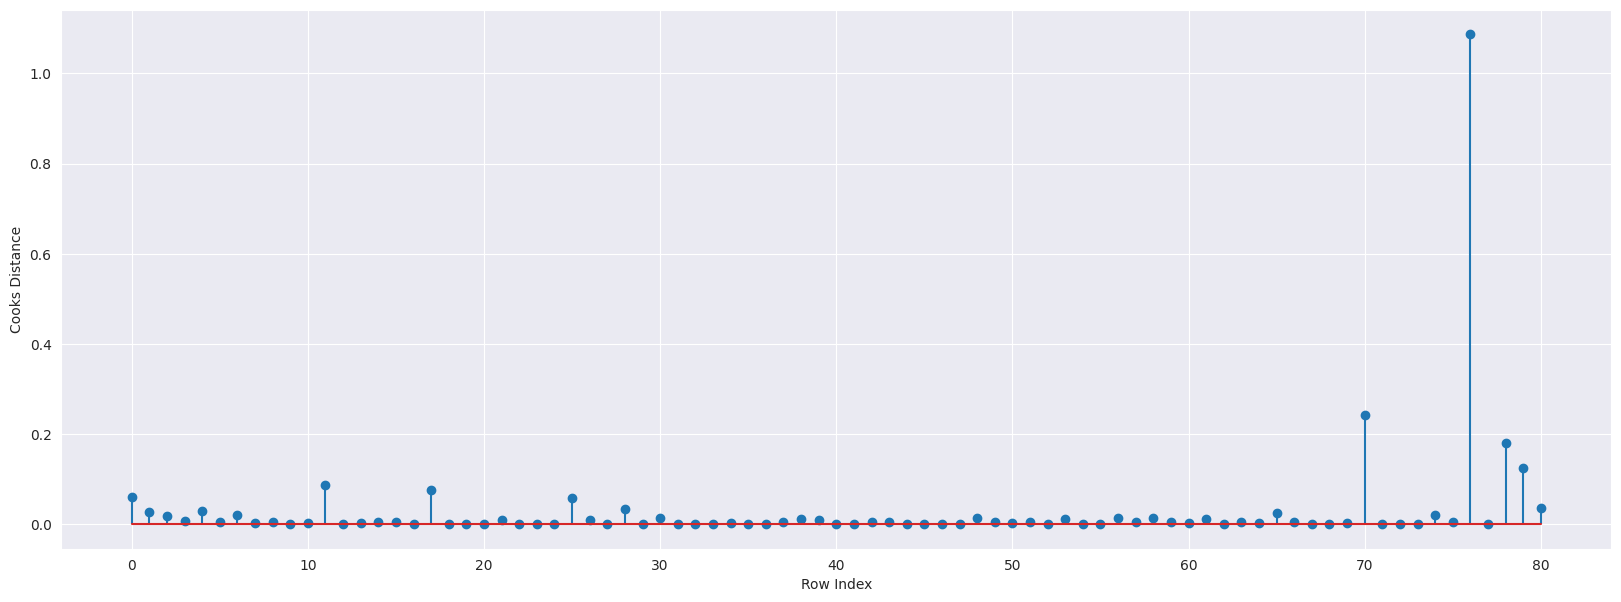

In [33]:
# plotting the influencer's values with the stem plot
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(cars)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [34]:
print(np.argmax(c),',',np.max(c))

76 , 1.086519399817987


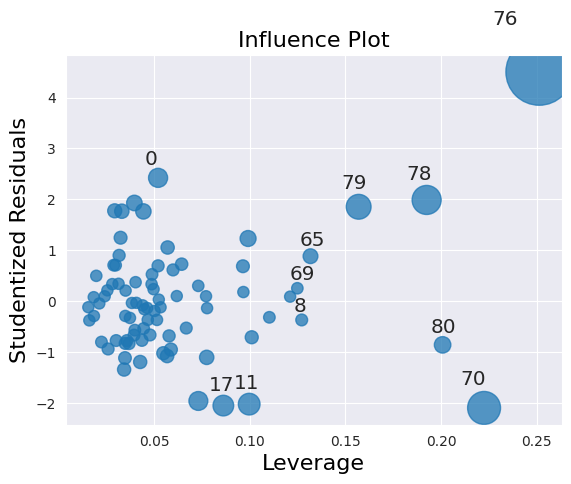

In [35]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [36]:
k=4 #independent value
n=cars.shape[0]
print('n              : ',n)
leverage_cutoff=3*((k+1)/n)
print('leverage cutoff: ',leverage_cutoff)

n              :  81
leverage cutoff:  0.18518518518518517


# **Improving the Model**

In [37]:
cars

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [38]:
cars_new=pd.read_csv("Cars.csv")

In [39]:
cars_new # Cars is original this data is copied into cars_new

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [40]:
car1=cars_new.drop(cars_new.index[[70,76]],axis=0).reset_index()

In [41]:
cars_new

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [42]:
car1

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...
74,75,175,18.762837,129,132.864163,42.778219
75,77,238,19.197888,115,150.576579,37.923113
76,78,263,34.000000,50,151.598513,15.769625
77,79,295,19.833733,119,167.944460,39.423099


In [43]:
car1=car1.drop(['index'],axis=1)

In [44]:
car1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


# **Build Model**

In [45]:
final_ml_VOL=smf.ols('MPG~HP+VOL+SP',data=car1).fit()

In [46]:
final_ml_VOL

In [47]:
print('VOL R^2    : ',final_ml_VOL.rsquared)
print('VOL AIC    : ',final_ml_VOL.aic)
print('VOL BIC    : ',final_ml_VOL.bic)
print('VOL Adj R^2: ',final_ml_VOL.rsquared_adj)

VOL R^2    :  0.8161692010376007
VOL AIC    :  446.11722639447726
VOL BIC    :  455.59501780434533
VOL Adj R^2:  0.8088159690791048


**Akaike Information Criterion (AIC)**

AIC is a metric used to compare different statistical models and select the best one. It estimates the relative amount of information lost when a particular model is used to represent the process that generates the data. In simple terms, it provides a trade-off between the goodness of fit of the model and the complexity of the model.

When comparing multiple models, a lower AIC value generally indicates a better model.

**Bayesian Information Criterion (BIC)**

BIC is another criterion used for model selection among a finite set of models. Similar to AIC, it also considers the goodness of fit and the complexity of the model. However, BIC penalizes model complexity more heavily than AIC.

When comparing multiple models, a lower BIC value generally indicates a better model.

In [48]:
final_ml_WT=smf.ols('MPG~HP+SP+WT',data=car1).fit()

In [49]:
print('WT R^2    : ',final_ml_WT.rsquared)
print('WT AIC    : ',final_ml_WT.aic)
print('WT BIC    : ',final_ml_WT.bic)
print('WT Adj R^2: ',final_ml_WT.rsquared_adj)

WT R^2    :  0.8160034320495304
WT AIC    :  446.18843235750313
WT BIC    :  455.6662237673712
WT Adj R^2:  0.8086435693315116


In [50]:
# model with vol is better because high rsquare value and low aic value compared to WT model

# **Cook's Distance**

In [51]:
model_influence_VOL=final_ml_VOL.get_influence()
(c_VOL,_)=model_influence_VOL.cooks_distance

In [52]:
model_influence_VOL

In [53]:
print(np.round(c_VOL,3))

[5.500e-02 2.900e-02 2.900e-02 5.000e-03 3.600e-02 4.000e-03 2.900e-02
 1.000e-03 1.000e-03 1.000e-03 3.000e-03 1.230e-01 1.000e-03 3.000e-03
 6.000e-03 3.000e-03 1.000e-03 1.230e-01 1.000e-03 0.000e+00 0.000e+00
 1.000e-02 0.000e+00 0.000e+00 2.000e-03 9.200e-02 4.000e-03 0.000e+00
 4.200e-02 0.000e+00 7.000e-03 1.000e-03 0.000e+00 1.000e-03 1.000e-03
 0.000e+00 0.000e+00 5.000e-03 5.000e-03 1.500e-02 0.000e+00 0.000e+00
 2.000e-03 3.000e-03 0.000e+00 1.000e-03 0.000e+00 0.000e+00 2.200e-02
 4.000e-03 4.000e-03 4.000e-03 0.000e+00 1.100e-02 1.000e-03 1.000e-03
 1.900e-02 4.000e-03 1.800e-02 7.000e-03 2.000e-03 1.500e-02 2.000e-03
 5.000e-03 2.000e-03 1.110e-01 3.000e-03 0.000e+00 1.000e-03 2.000e-02
 0.000e+00 0.000e+00 0.000e+00 3.100e-02 3.000e-03 1.300e-02 1.163e+00
 4.690e-01 1.400e-02]


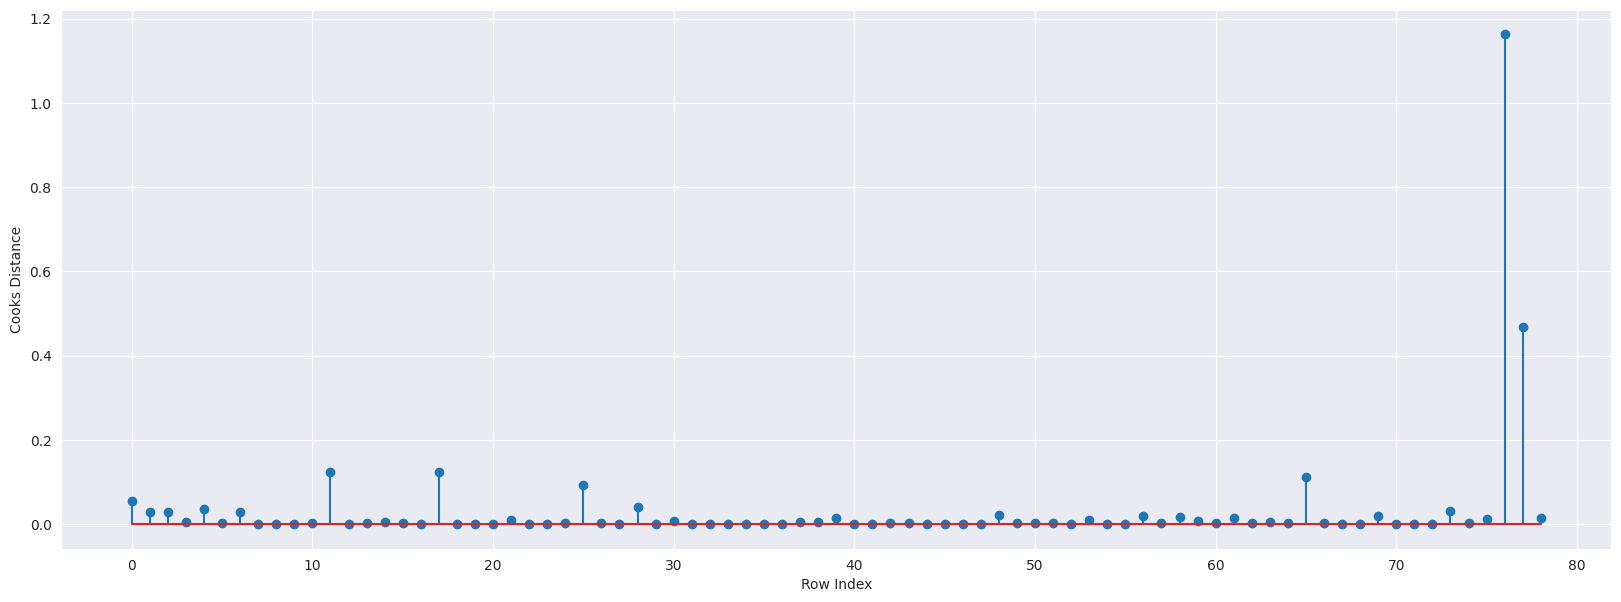

In [54]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.round(c_VOL,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [55]:
print('outlier pos: ',np.argmax(c_VOL),',','outlier value: ',np.max(c_VOL))

outlier pos:  76 , outlier value:  1.1629387469135295


In [56]:
car1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


In [57]:
car2=car1.drop(car1.index[[76]],axis=0)

In [58]:
car2.shape

(78, 5)

In [59]:
car2

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
77,295,19.833733,119,167.944460,39.423099


In [60]:
car3=car2.reset_index()

In [61]:
car3

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...
73,73,140,19.086341,129,121.864163,42.618698
74,74,175,18.762837,129,132.864163,42.778219
75,75,238,19.197888,115,150.576579,37.923113
76,77,295,19.833733,119,167.944460,39.423099


In [62]:
car4=car3.drop(['index'],axis=1)

In [63]:
car4

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,295,19.833733,119,167.944460,39.423099


In [64]:
#building the model on the new data
final_ml_VOL=smf.ols('MPG~HP+VOL+SP',data=car4).fit()

In [65]:
final_ml_VOL

In [66]:
# checking for the influencers
model_influence_VOL=final_ml_VOL.get_influence()
(c_VOL,_)=model_influence_VOL.cooks_distance # we gave _ because we are ignoring p values.

In [67]:
np.arange(len(car4))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77])

In [68]:
np.round(c_VOL,3)

array([6.000e-02, 3.000e-02, 3.000e-02, 5.000e-03, 3.800e-02, 3.000e-03,
       3.000e-02, 1.000e-03, 1.000e-03, 0.000e+00, 4.000e-03, 1.100e-01,
       3.000e-03, 4.000e-03, 7.000e-03, 4.000e-03, 1.000e-03, 1.100e-01,
       1.000e-03, 0.000e+00, 1.000e-03, 1.000e-02, 0.000e+00, 0.000e+00,
       2.000e-03, 8.000e-02, 1.000e-03, 1.000e-03, 3.800e-02, 1.000e-03,
       6.000e-03, 1.000e-03, 0.000e+00, 0.000e+00, 1.000e-03, 0.000e+00,
       0.000e+00, 5.000e-03, 5.000e-03, 1.400e-02, 0.000e+00, 0.000e+00,
       2.000e-03, 3.000e-03, 0.000e+00, 1.000e-03, 0.000e+00, 0.000e+00,
       2.000e-02, 4.000e-03, 4.000e-03, 4.000e-03, 0.000e+00, 8.000e-03,
       1.000e-03, 1.000e-03, 1.800e-02, 4.000e-03, 1.700e-02, 1.000e-02,
       2.000e-03, 1.700e-02, 4.000e-03, 5.000e-03, 2.000e-03, 4.900e-01,
       2.000e-03, 0.000e+00, 0.000e+00, 7.700e-02, 0.000e+00, 0.000e+00,
       8.000e-03, 3.600e-02, 2.000e-03, 5.400e-02, 1.083e+00, 1.000e-02])

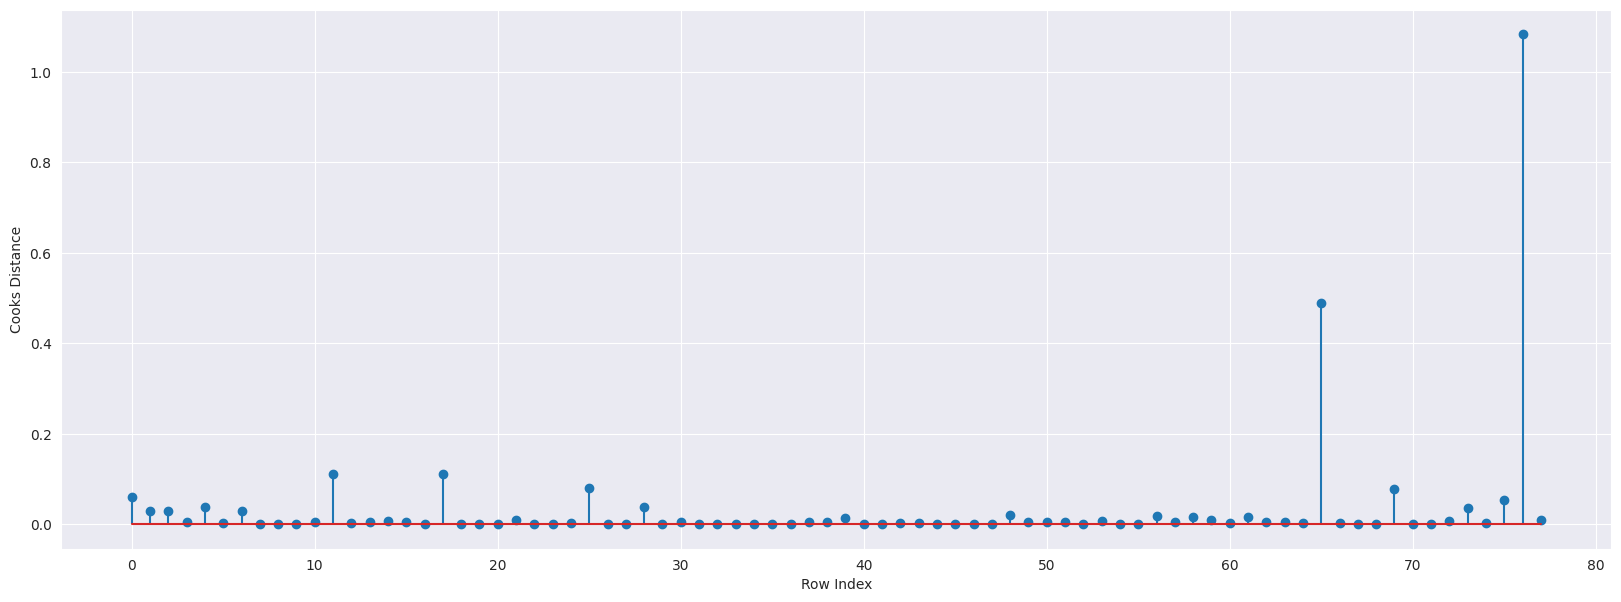

In [69]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car4)),np.round(c_VOL,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [70]:
# index of the data point wher c>.5
print('outlier pos: ',np.argmax(c_VOL),',','oulier val: ',np.max(c_VOL))

outlier pos:  76 , oulier val:  1.0834592065958666


In [71]:
car1 #this data set is we have removed 70 th and 76th value from the original Cars.csv dataset

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


In [72]:
car4

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,295,19.833733,119,167.944460,39.423099


In [73]:
print(car1.index[[76]])

Index([76], dtype='int64')


In [75]:
car5=car4.drop(car4.index[[76]],axis=0)
car5

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [77]:
car6=car5.reset_index()
car6

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...
72,72,140,19.086341,160,124.715241,52.997752
73,73,140,19.086341,129,121.864163,42.618698
74,74,175,18.762837,129,132.864163,42.778219
75,75,238,19.197888,115,150.576579,37.923113


In [78]:
car7=car6.drop(['index'],axis=1)
car7

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [79]:
final_ml_VOL=smf.ols('MPG~HP+VOL+SP',data=car7).fit()

In [80]:
final_ml_VOL

In [81]:
print('VOL R^2 val: ',final_ml_VOL.rsquared)
print('VOL AIC val: ',final_ml_VOL.aic)

VOL R^2 val:  0.8669636111859061
VOL AIC val:  409.41530627195084


In [82]:
model_influence_VOL=final_ml_VOL.get_influence()
(c_VOL,_)=model_influence_VOL.cooks_distance

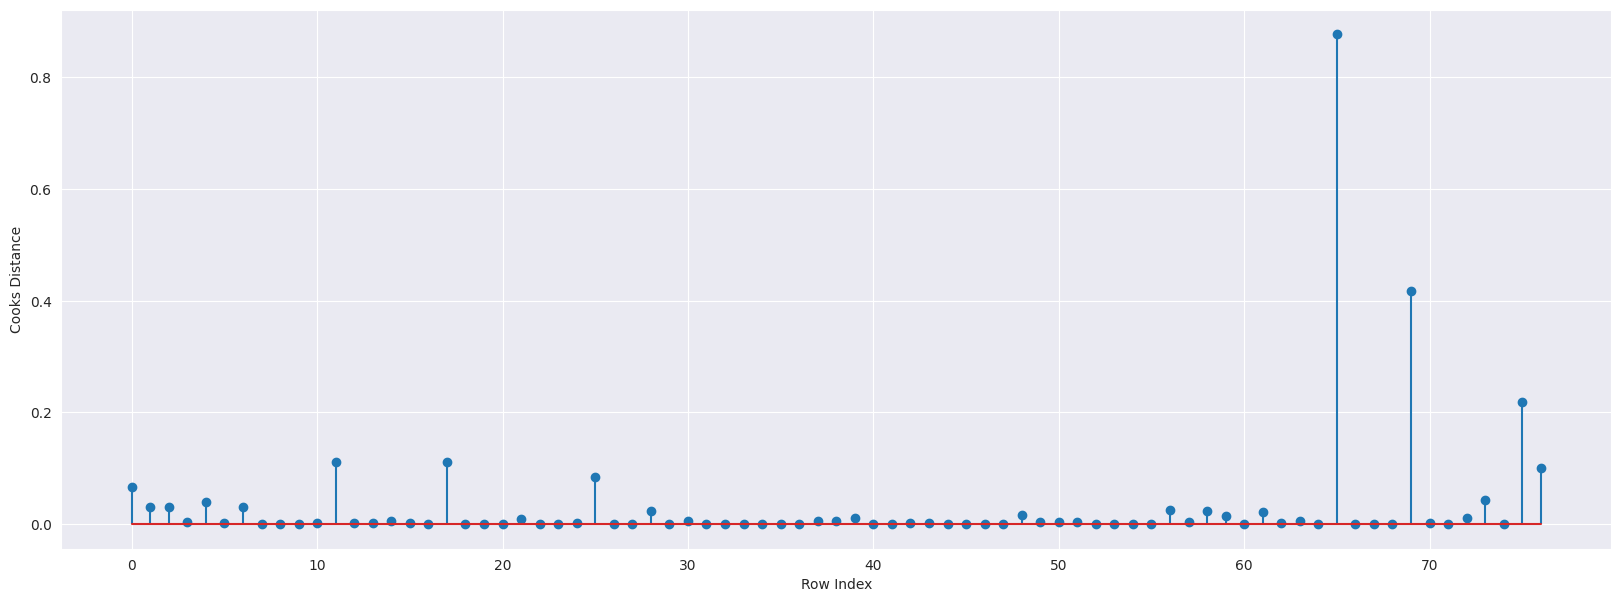

In [83]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
fig=plt.subplots(figsize=(20,7))
plt.stem(np.round(c_VOL,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

cook's distance <1 we do not have any outlier therefore we don't need perform any other regression

In [85]:
print('max value    : ',np.max(c_VOL))
print('mac value pos: ',np.argmax(c_VOL))

max value    :  0.8774556986296774
mac value pos:  65


# **Predicting for New Data**

In [87]:
new_data=pd.DataFrame({'HP':40,
                       'VOL':95,
                       'SP':102,
                       'WT':35},index=[1])

In [88]:
final_ml_VOL.predict(new_data)

,0
1,46.035594


In [89]:
final_ml_VOL.predict(cars_new.iloc[0:5])

,0
0,45.428872
1,43.992392
2,43.992392
3,43.508150
4,44.085858
